## Project 1 - Mobile Home Parks and Tornadoes Risk Assessment in the US.

   ### Objective: 

   #### Assess the risk of tornado occurrences for mobile home parks in the US. Tornadoes pose a significant threat to mobile home parks due to their vulnerability to high winds and flying debris. By analyzing historical tornado data and the spatial distribution of mobile home parks, the project aims to identify high-risk areas and provide recommendations for mitigation strategies.

### Step 1: Imported Libraries: Pandas, geopandas, shapely, matplotlib, geoviews, hvplot, numpy and scipy

In [2]:

# Imported Libraries: Pandas, geopandas, shapely, matplotlib, geoviews, hvplot, numpy and scipy

# import dependencies

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geoviews as gv
import geoviews.tile_sources as gvts
import hvplot.pandas
import matplotlib.colors as mcolors
import numpy as np



### Step 2: Define file paths and read data from both CSV's

In [3]:

# Define file paths and read data from both CSV's

# define paths for both files

tornadoes_data_path = "1950-2021_all_tornadoes.csv"
mobile_home_parks_path = "Mobile_Home_Parks.csv"

# Read the data from both csv's 

tornadoes_data = pd.read_csv(tornadoes_data_path)
mobile_home_data = pd.read_csv(mobile_home_parks_path)

display(tornadoes_data)
display(mobile_home_data) 


,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,...,0.73,30,1,1,1,109,0,0,0,0
68864,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,...,1.45,30,1,1,1,109,0,0,0,0
68865,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,...,1.45,50,1,1,1,129,0,0,0,0
68866,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,...,0.75,75,1,1,1,13,0,0,0,0


,index,X,Y,FID,MHPID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,UNITS,SIZE,YEARBLT,RevGeoFlag
0,0,-81.687714,28.852114,2001,2101,Sharp's Mobile Park,43 Sharp Circle,Not Available,Eustis,FL,...,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Both Internet and Imagery,2013-03-04T00:00:00.000Z,Not Available,0,Not Available,,No
1,1,-85.232052,30.771086,2002,2001,Stage Creek Trailer Park,4366 Pearl Street,Not Available,Marianna,FL,...,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-01T00:00:00.000Z,Not Available,0,Not Available,,No
2,2,-85.163627,30.789739,2003,2002,Springside Estates,5164 Copper Lane,Not Available,Marianna,FL,...,Residential trailer parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-01T00:00:00.000Z,Not Available,0,Not Available,,No
3,3,-81.687733,28.815828,2004,2102,Lake Saunders Mobile Home Park,4301 Hwy 19A,Not Available,Mount Dora,FL,...,Mobile (manufactured) home parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-06T00:00:00.000Z,Not Available,0,Not Available,,No
4,4,-81.784127,28.529614,2005,2103,Jones Cypress Cove Resort,10233 Cypress Cove Lane,Not Available,Clermont,FL,...,Mobile (manufactured) home parks,Open,1900-01-01T00:00:00.000Z,Imagery or Map Only,2013-03-06T00:00:00.000Z,Not Available,0,Not Available,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38524,38524,-92.391481,34.884523,38525,41433,Not Available,14121 Overstreet Rd,Not Available,Maumelle,AR,...,Residential trailer parks,Imagery,2015-01-30T00:00:00.000Z,Both Internet and Imagery,2015-01-30T00:00:00.000Z,Not Available,0,S,,No
38525,38525,-84.350860,40.832630,38526,41219,Not Available,826 Skinner St,Not Available,Delphos,OH,...,Residential trailer parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No
38526,38526,-83.823340,40.754216,38527,41220,Not Available,4525 State Route 235,Not Available,Ada,OH,...,Recreational vehicle parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No
38527,38527,-83.815211,40.769507,38528,41221,Not Available,547 E Lincoln Ave,Not Available,Ada,OH,...,Residential trailer parks,Imagery,2015-01-23T00:00:00.000Z,Both Internet and Imagery,2015-01-23T00:00:00.000Z,Not Available,0,M,,No


### Step 3: Cleaning and renaming the data for both CSV files (for later merging)

In [4]:

# Cleaning and renaming the data for both CSV files (for later merging)

# Rename columns in tornadoes_data
clean_tornadoes_data = tornadoes_data.rename(columns={
    "yr": "year",
    "mo": "month",
    "dy": "day",
    "st": "state",
    "mag": "magnitude",
    "inj": "injuries",
    "fat": "fatalities",
    "loss": "propertyloss",
    "closs": "lossinmillions",
    "slat": "latitude",
    "slon": "longitude",
    "elat": "latitudeend",
    "elon": "longitudeend",
    "len": "lengthinmiles",
    "wid": "widthinyards",
    })
# Delete columns in tornadoes_data
clean_tornadoes_data = clean_tornadoes_data.drop(columns={"om","tz","stf","stn","ns","sn","sg","f1","f2","f3","f4","fc"})
clean_tornadoes_data = clean_tornadoes_data[(clean_tornadoes_data['latitude'] != 0) | (clean_tornadoes_data['longitude'] != 0)]
clean_tornadoes_data['latitude'] = clean_tornadoes_data['latitude'].round(1)
clean_tornadoes_data['longitude'] = clean_tornadoes_data['longitude'].round(1)
display(clean_tornadoes_data)
# Rename columns in mobile_home_data
clean_mobile_home_data = mobile_home_data.rename(columns={
    "NAME": "name",
    "ADDRESS": "address",
    "CITY": "city",
    "STATE": "state",
    "ZIP": "zipcode",
    "TELEPHONE": "telephone",
    "TYPE": "type",
    "STATUS": "status",
    "COUNTY": "county",
    "LATITUDE": "latitude",
    "LONGITUDE": "longitude"
    })
# Delete columns in mobile home parks data
clean_mobile_home_data = clean_mobile_home_data.drop(columns={
"X", "Y", "FID", "MHPID", "ADDRESS2", "ZIP4", "COUNTYFIPS",
"COUNTRY", "NAICS_CODE", "NAICS_DESC", "SOURCE",
"SOURCEDATE", "VAL_METHOD", "VAL_DATE", "WEBSITE","index",
"UNITS", "SIZE", "YEARBLT", "RevGeoFlag"})
clean_mobile_home_data = clean_mobile_home_data[(clean_mobile_home_data['latitude'] != 0) | (clean_mobile_home_data['longitude'] != 0)]
# Round coordinates to 4 decimal places
clean_mobile_home_data['latitude'] = clean_mobile_home_data['latitude'].round(1)
clean_mobile_home_data['longitude'] = clean_mobile_home_data['longitude'].round(1)
display(clean_mobile_home_data)

,year,month,day,date,time,state,magnitude,injuries,fatalities,propertyloss,lossinmillions,latitude,longitude,latitudeend,longitudeend,lengthinmiles,widthinyards
0,1950,10,1,1950-10-01,21:00:00,OK,1,0,0,4.0,0.0,36.7,-102.5,36.8800,-102.3000,15.80,10
1,1950,10,9,1950-10-09,02:15:00,NC,3,3,0,5.0,0.0,34.2,-78.6,0.0000,0.0000,2.00,880
2,1950,11,20,1950-11-20,02:20:00,KY,2,0,0,5.0,0.0,37.4,-87.2,0.0000,0.0000,0.10,10
3,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,0.0,38.2,-84.5,0.0000,0.0000,0.10,10
4,1950,11,20,1950-11-20,07:30:00,MS,1,3,0,4.0,0.0,32.4,-89.1,0.0000,0.0000,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,2021,9,8,2021-09-08,15:32:00,PA,1,0,0,0.0,0.0,40.8,-77.0,40.7507,-76.9959,0.73,30
68864,2021,9,8,2021-09-08,15:35:00,PA,0,0,0,20000.0,0.0,40.8,-76.9,40.7561,-76.8878,1.45,30
68865,2021,9,8,2021-09-08,19:08:00,FL,0,0,0,0.0,0.0,30.2,-84.4,30.1775,-84.4629,1.45,50
68866,2021,9,9,2021-09-09,02:10:00,CT,0,0,0,40000.0,0.0,41.8,-72.3,41.7570,-72.2880,0.75,75


,name,address,city,state,zipcode,telephone,type,status,county,latitude,longitude
0,Sharp's Mobile Park,43 Sharp Circle,Eustis,FL,32726,352-357-5254,Mobile Home Park,Open,Lake,28.9,-81.7
1,Stage Creek Trailer Park,4366 Pearl Street,Marianna,FL,32446,850-638-8570,Mobile Home Park,Open,Jackson,30.8,-85.2
2,Springside Estates,5164 Copper Lane,Marianna,FL,32446,252-241-8399,Mobile Home Park,Open,Jackson,30.8,-85.2
3,Lake Saunders Mobile Home Park,4301 Hwy 19A,Mount Dora,FL,32757,407-704-2136,Mobile Home Park,Open,Lake,28.8,-81.7
4,Jones Cypress Cove Resort,10233 Cypress Cove Lane,Clermont,FL,34711,352-394-7900,Mobile Home Park,Open,Lake,28.5,-81.8
...,...,...,...,...,...,...,...,...,...,...,...
38524,Not Available,14121 Overstreet Rd,Maumelle,AR,72113,Not Available,Mobile Home Park,Unknown,Pulaski,34.9,-92.4
38525,Not Available,826 Skinner St,Delphos,OH,45833,Not Available,Mobile Home Park,Unknown,Van Wert,40.8,-84.4
38526,Not Available,4525 State Route 235,Ada,OH,45810,Not Available,MHP/RV/Migrant Housing,Unknown,Hardin,40.8,-83.8
38527,Not Available,547 E Lincoln Ave,Ada,OH,45810,Not Available,Mobile Home Park,Unknown,Hardin,40.8,-83.8


### Step 4: Merging data from both data sets, based on coordenates.

In [5]:
# Merging data from both data sets, based on coordenates.
tornado_mobiles_merge = pd.merge(clean_tornadoes_data, clean_mobile_home_data, left_on=["longitude","latitude"],right_on=["longitude","latitude"])
merge_data_df = pd.DataFrame(tornado_mobiles_merge)
# Export the tornado_mobiles_merge data into a csv
merge_data_df.to_csv("../Project1Bootcamp/tornadoesandparksmerged.csv")
merge_data_df

,year,month,day,date,time,state_x,magnitude,injuries,fatalities,propertyloss,...,widthinyards,name,address,city,state_y,zipcode,telephone,type,status,county
0,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,...,10,Spindletop Village,101 Dale Drive,Georgetown,KY,40324,502-863-5656,Mobile Home Park,Open,Scott
1,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,...,10,Not Available,1175 Lisle Rd,Georgetown,KY,40324,Not Available,Mobile Home Park,Open,Scott
2,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,...,10,Not Available,4812 Georgetown Rd,Lexington,KY,40511,Not Available,Mobile Home Park,Open,Fayette
3,1950,11,20,1950-11-20,04:00:00,KY,1,0,0,5.0,...,10,Not Available,1250 Paris Pike,Georgetown,KY,40324,Not Available,Mobile Home Park,Open,Scott
4,1977,10,1,1977-10-01,08:00:00,KY,1,0,0,5.0,...,400,Spindletop Village,101 Dale Drive,Georgetown,KY,40324,502-863-5656,Mobile Home Park,Open,Scott
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104568,2021,9,1,2021-09-01,14:15:00,PA,2,0,0,500000.0,...,350,Not Available,16 Circle Dr,Nottingham,PA,19362,Not Available,Mobile Home Park,Open,Chester
104569,2021,9,7,2021-09-07,17:45:00,MI,1,0,0,0.0,...,450,Hillside Acres MHP,5200 Bankers Road,Reading,MI,49274,517-283-2844,Mobile Home Park,Open,Hillsdale
104570,2021,9,7,2021-09-07,17:45:00,MI,1,0,0,0.0,...,450,Not Available,2722 W Card Rd,Hillsdale,MI,49242,Not Available,Mobile Home Park,Unknown,Hillsdale
104571,2021,9,9,2021-09-09,02:10:00,CT,0,0,0,40000.0,...,75,Not Available,541 Middle Tpke,Mansfield Town Of,CT,6268,Not Available,Mobile Home Park,Open,Tolland


### Step 5: Plot the number of tornadoes vs years

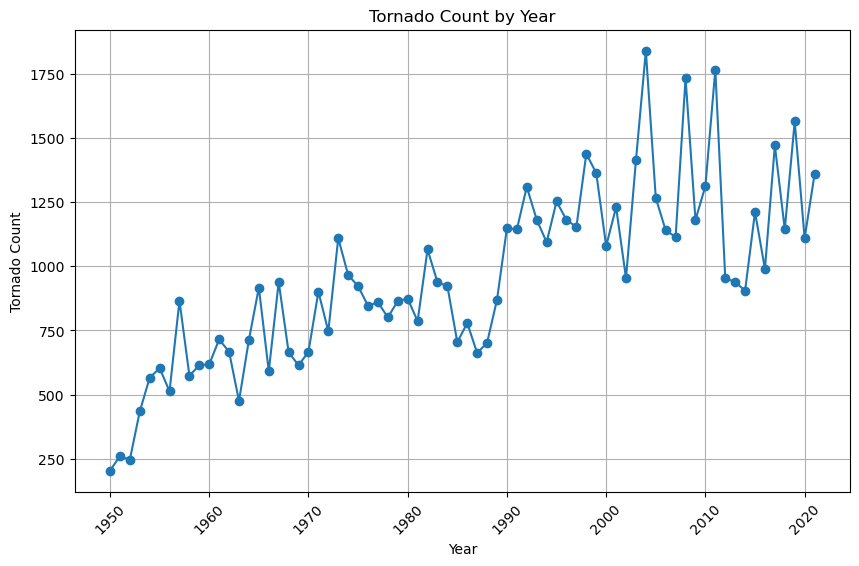

In [6]:

# Formats the 'year' column to datetime format for further processing
clean_tornadoes_data['year'] = pd.to_datetime(clean_tornadoes_data['year'], format='%Y')

# Group the data by year and calculate the tornado count for each year
tornadoes_by_year = clean_tornadoes_data.groupby(clean_tornadoes_data['year'].dt.year).size()

# Plot the tornado count over time
plt.figure(figsize=(10, 6))
plt.plot(tornadoes_by_year.index, tornadoes_by_year.values, marker='o', linestyle='-')
plt.title('Tornado Count by Year')
plt.xlabel('Year')
plt.ylabel('Tornado Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Graph 1: From 1950 to 2021, a total of 68739 tornadoes were registered in the US. An increasing tornado tendency over time in the US can be observed in the shown graph.

### Step 6: Calculate and plot the distribution of tornadoes based on the Fujita Scale Category, scale for rating tornado intensity, 
### based primarily on the damage tornadoes inflict on human-built structures and vegetation.

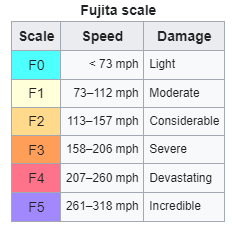

C:\Users\pablo\AppData\Local\Temp\ipykernel_23852\1997196134.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, val + 5, f'{percentage[i]:.2f}%', ha='center')


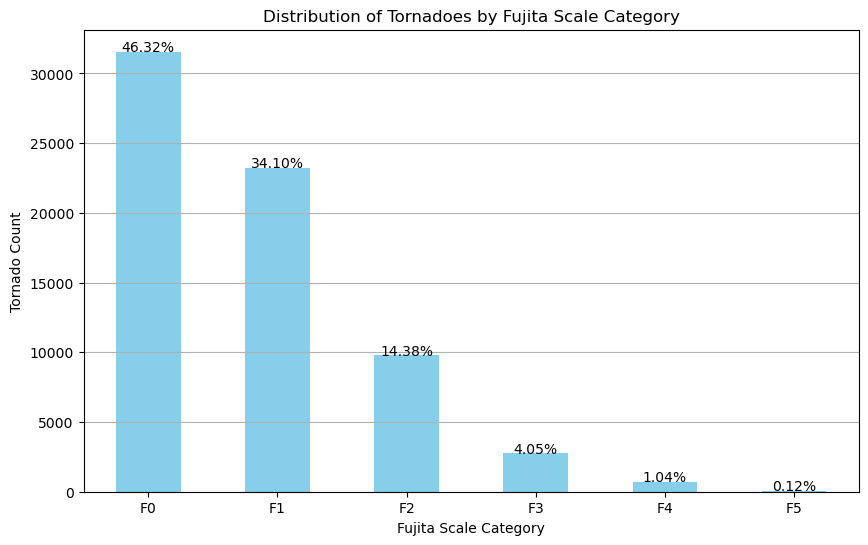

In [7]:

# Define a dictionary to map magnitudes from database to Fujita scale categories
fujita_scale_map = {0: 'F0', 1: 'F1', 2: 'F2', 3: 'F3', 4: 'F4', 5: 'F5'}

# Apply the mapping to create the 'fujita_scale_category' column
clean_tornadoes_data['fujita_scale_category'] = clean_tornadoes_data['magnitude'].map(fujita_scale_map)

# Calculate the distribution of the Fujita scale category
fujita_scale_distribution = clean_tornadoes_data['fujita_scale_category'].value_counts()

# Calculate the percentage of each category
percentage = (fujita_scale_distribution / fujita_scale_distribution.sum()) * 100

# Plot a bar chart to show the distribution of the Fujita scale category
plt.figure(figsize=(10, 6))
bars = fujita_scale_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Tornadoes by Fujita Scale Category')
plt.xlabel('Fujita Scale Category')
plt.ylabel('Tornado Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add grid lines to the y-axis

# Annotate bars with percentage values
for i, val in enumerate(fujita_scale_distribution):
    plt.text(i, val + 5, f'{percentage[i]:.2f}%', ha='center')
plt.show()


##### Graph 2 : Graph shows the distribution of the tornadoes categorize by Fujita Scale. F0 is the most frequent tornado category with 46.32% of all registered tornadoes in the data set. The most dangerous categories (F3,F4,F5) only represent 5.21%.

### Step 7: Count tornado ocurrences by state and visualize top 10 most affected states.

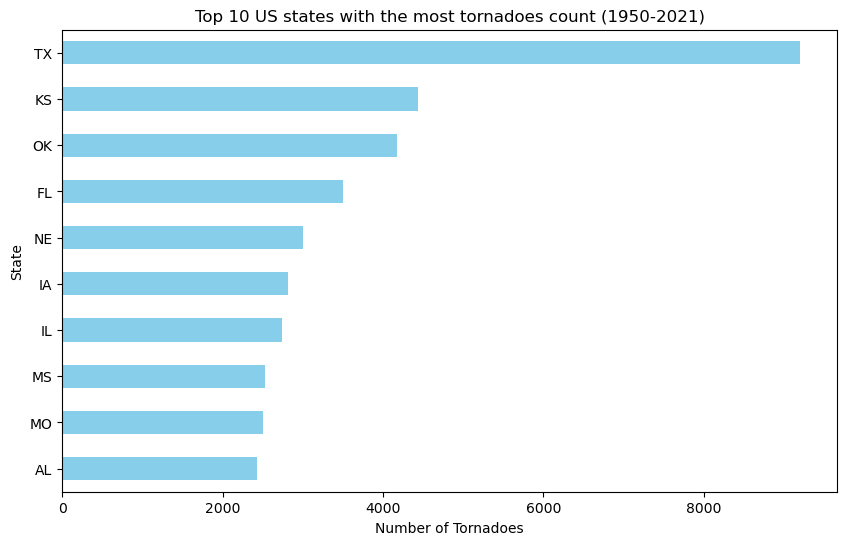

The top 10 states represent 54.33% of all tornado occurrences.


In [8]:

# Count occurrences of tornadoes by state and sort from highest to lowest
tornado_count_by_state = clean_tornadoes_data["state"].value_counts().sort_values(ascending=False)

# Visualize the top 10 states most affected by tornadoes
top_affected_states = tornado_count_by_state.head(10)

# Plot in a horizontal bar chart
plt.figure(figsize=(10, 6))
tornado_count_by_state.head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 US states with the most tornadoes count (1950-2021)')
plt.xlabel('Number of Tornadoes')
plt.ylabel('State')
plt.show()

# Calculate the total number of tornado occurrences
total_tornadoes = tornado_count_by_state.sum()
# Calculate the total number of tornado occurrences accounted for by the top 10 states
total_top_10_tornadoes = top_affected_states.sum()
# Calculate the percentage of tornado occurrences represented by the top 10 states
percentage_top_10 = (total_top_10_tornadoes / total_tornadoes) * 100
print("The top 10 states represent {:.2f}% of all tornado occurrences.".format(percentage_top_10))

Graph 3: This Graph shows the top 10 states with the most ammount of tornadoes in the last 71 years. Texas is the state with the most tornado ocurrences, however Tornado Category is not taken into account.

### Step 8: Calculate the total number of victims by state and visualize the top 10 states.

C:\Users\pablo\AppData\Local\Temp\ipykernel_23852\3421324673.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_victims = tornado_victims_top_10['injuries'][i] + tornado_victims_top_10['fatalities'][i]
C:\Users\pablo\AppData\Local\Temp\ipykernel_23852\3421324673.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(tornado_victims_top_10['injuries'][i] + 50, i, str(total_victims) + " injured", va='center', color='black')
C:\Users\pablo\AppData\Local\Temp\ipykernel_23852\3421324673.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

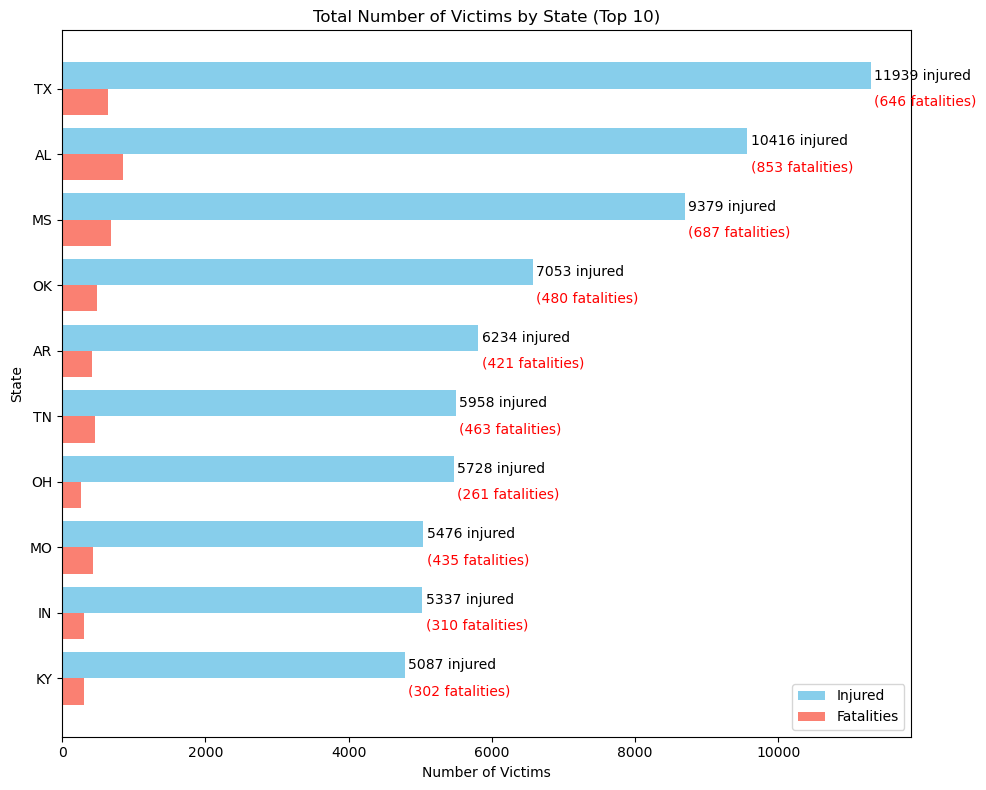

In [9]:

# Total number of victims (injured and fatalities) by state using GroupBy
tornado_victims_by_state = clean_tornadoes_data.groupby('state')[['injuries', 'fatalities']].sum()
# Select the top ten states with the highest total number of victims
top_10_states = tornado_victims_by_state.sum(axis=1).nlargest(10).index  # nlargest function is used
tornado_victims_top_10 = tornado_victims_by_state.loc[top_10_states]  # using loc function
# Visualize the total number of victims (injured and fatalities) by state in a horizontal bar chart
# Configure the plot
plt.figure(figsize=(10, 8))
bar_width = 0.4
index = np.arange(len(tornado_victims_top_10))  # creating the index
plt.barh(index, tornado_victims_top_10['injuries'], bar_width, label='Injured', color='skyblue')
plt.barh(index + bar_width, tornado_victims_top_10['fatalities'], bar_width, label='Fatalities', color='salmon')
plt.xlabel('Number of Victims')
plt.ylabel('State')
plt.title('Total Number of Victims by State (Top 10)')
plt.yticks(index + bar_width / 2, tornado_victims_top_10.index)
# Add labels with just the total number of victims on each bar
for i in range(len(tornado_victims_top_10)):
    total_victims = tornado_victims_top_10['injuries'][i] + tornado_victims_top_10['fatalities'][i]
    plt.text(tornado_victims_top_10['injuries'][i] + 50, i, str(total_victims) + " injured", va='center', color='black')
    plt.text(tornado_victims_top_10['injuries'][i] + 50, i + bar_width, "(" + str(tornado_victims_top_10['fatalities'][i]) + " fatalities)", va='center', color='red')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis so that states appear in descending order
plt.tight_layout()

Graph 4: This graph shows the total number of victims caused by Tornadoes; categorized by injuries and fatalities. I is clear that tornadoes have an effect on peoples safety, so, it is important to identify risk zones of tornadoes

### Step 9: Calculate the tornado count for matching locations (Mobile Home Parks and Tornadoes)

In [10]:

# Using Groupby to add tornado counts to matching locations from the merge_data_df
tornado_count_by_location = merge_data_df.groupby(['latitude', 'longitude']).size().reset_index(name='tornado_count')

# Step 1: Calculate the yearly average tornado count by Location
tornado_count_by_location['yearly_average'] = tornado_count_by_location['tornado_count'] / 71  # 71 years since 1950 and 2021
print(tornado_count_by_location)

      latitude  longitude  tornado_count  yearly_average
0         24.6      -81.8             44        0.619718
1         24.6      -81.7            138        1.943662
2         24.6      -81.6              4        0.056338
3         24.6      -81.3              1        0.014085
4         24.7      -81.5             12        0.169014
...        ...        ...            ...             ...
7215      48.8      -95.8              1        0.014085
7216      48.8      -95.7              4        0.056338
7217      48.9      -99.6              6        0.084507
7218      48.9      -95.5              3        0.042254
7219      48.9      -95.3              3        0.042254

[7220 rows x 4 columns]


### Step 10: Define risk thresholds for Mobile Home Park locations based on tornadoes frequency and classify accordingly with yearly average.

In [11]:

# Define risk thresholds
low_threshold = 1
moderate_threshold = 3
high_threshold = 6
# very high will be calculated with the 'else' in the next function

# Classify yearly average tornado counts into risk scale
def classify_tornado_risk(yearly_average):
    if yearly_average <= low_threshold:
        return 'Low Risk'
    elif yearly_average <= moderate_threshold:
        return 'Moderate Risk'
    elif yearly_average <= high_threshold:
        return 'High Risk'
    else:
        return 'Very High Risk'

# Add a new column 'risk_category' to tornado_count_by_location DataFrame
tornado_count_by_location['risk_category'] = tornado_count_by_location['yearly_average'].apply(classify_tornado_risk)

# Display the updated DataFrame
print(tornado_count_by_location)


      latitude  longitude  tornado_count  yearly_average  risk_category
0         24.6      -81.8             44        0.619718       Low Risk
1         24.6      -81.7            138        1.943662  Moderate Risk
2         24.6      -81.6              4        0.056338       Low Risk
3         24.6      -81.3              1        0.014085       Low Risk
4         24.7      -81.5             12        0.169014       Low Risk
...        ...        ...            ...             ...            ...
7215      48.8      -95.8              1        0.014085       Low Risk
7216      48.8      -95.7              4        0.056338       Low Risk
7217      48.9      -99.6              6        0.084507       Low Risk
7218      48.9      -95.5              3        0.042254       Low Risk
7219      48.9      -95.3              3        0.042254       Low Risk

[7220 rows x 5 columns]


### Step 11: Filter and display all 'Low Risk' Mobile Home Park locations, based on tornadoes risk thresholds.

In [12]:

# Define custom colors for risk categories
risk_colors = {
    'Low Risk': 'green',
}

# Filter locations with risk category other than "Low Risk"
high_risk_locations = tornado_count_by_location[tornado_count_by_location['risk_category'] == 'Low Risk']

# Plot the map using hvplot with geo=True and OSM tiles
risk_map1 = high_risk_locations.hvplot(
    kind='points',
    x='longitude',
    y='latitude',
    c='risk_category',
    tiles='OSM',
    colorbar=True,
    cmap=mcolors.ListedColormap([risk_colors[r] for r in risk_colors if r == 'Low Risk']),
    frame_width=800,
    frame_height=600,
    title='Low risk Mobile Home Parks in the US',
    geo=True,
)

# Display the map
risk_map1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (risk_category)

Map 1: The map shows the low risk mobile home parks based on the yearly average of tornadoes ocurrence. This map allows  safe mobile home parks idetification for vacations or residency.

### Step 12: Filter and display all 'Moderate, High and Very High risk' Mobile Home Park locations, based on tornadoes risk thresholds.

In [13]:

# Define custom colors for risk categories
risk_colors = {
    'Moderate Risk': 'blue',
    'High Risk': 'orange',
    'Very High Risk': 'red'
}

# Filter locations with risk category other than "Low Risk"
high_risk_locations = tornado_count_by_location[tornado_count_by_location['risk_category'] != 'Low Risk']

# Plot the map using hvplot with geo=True and OSM tiles
risk_map2 = high_risk_locations.hvplot(
    kind='points',
    x='longitude',
    y='latitude',
    c='risk_category',
    tiles='OSM',
    colorbar=True,
    cmap=mcolors.ListedColormap([risk_colors[r] for r in risk_colors if r != 'Low Risk']),
    frame_width=800,
    frame_height=600,
    title='Tornado Risk Classification',
    geo=True,
)

# Display the map
risk_map2


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (risk_category)

Map 2: The map displays the Moderate to Very High risk mobile home parks based on the yearly average of tornadoes ocurrence. This map shows the most unsafe mobile home parks for vacations or residency.

### Conclusions and posible uses for this info.

#### 1. There are numerous mobile home parks that are in a moderate to very high tornado ocurrance risk, even though most of them have a low risk threshold.
#### 2.- Florida is the state with the highest risk of experiencing a tornado according to the historical annual average.
#### 3.- This data can be useful for government use for requesting resources against disasters and have contingency plans prepared.
#### 4.- The data can help select an appropriate place to vacation or live in a mobile home. 
#### 5.- The data can also be used by insurers to offer insurance against natural disasters on high tornado risk sites.